# Analysis of the polarity results: graphical


This notebook contains the scripts to visualize the trend of each contraceptive class per year.

In [368]:
#####################
# Load Libraries    #
#####################
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("Kendall")
library("ggplot2")
library("dplyr")
library("reshape2")
library("Kendall")
rm(list=ls())

In [413]:
linerGraph <- function( category, title, statSignificant ){
    select <- read.delim(paste0("/home/ec2-user/SageMaker/polarityPerYear/", category, ".txt" ))
    
    select <- select[ , c("year", "positiveConfident", "negativeConfident", "neutralConfident")]
    select <- select[ select$year != "Total", ]
    selectMelt <- melt( select )
    selectMelt$variable <- gsub( "positiveConfident", "Positive", selectMelt$variable )
    selectMelt$variable <- gsub( "negativeConfident", "Negative", selectMelt$variable )
    selectMelt$variable <- gsub( "neutralConfident", "Neutral", selectMelt$variable )
    colnames( selectMelt)[2] <- "Category" 
    
    selectMelt$value <- ifelse( selectMelt$value > 3000, 3000, selectMelt$value)
    
    pos <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Positive", "value"])[[2]] ), digits = 3 ) 
    neg <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Negative", "value"])[[2]] ), digits = 3 ) 
    neu <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Neutral", "value"])[[2]] ), digits = 3 ) 
    
    selectMelt$label <- ""
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Positive"] <- ifelse( as.numeric(pos) < statSignificant & as.numeric(pos) > 0.005, "*", 
                                                                                             ifelse( as.numeric(pos) < 0.005 & as.numeric(pos) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(pos) < 0.0005, "***", "")))
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Negative"] <- ifelse( as.numeric(neg) < statSignificant & as.numeric(neg) > 0.005, "*", 
                                                                                             ifelse( as.numeric(neg) < 0.005 & as.numeric(neg) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(neg) < 0.0005, "***", "")))
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Neutral"] <- ifelse( as.numeric(neu) < statSignificant & as.numeric(neu) > 0.005, "*", 
                                                                                             ifelse( as.numeric(neu) < 0.005 & as.numeric(neu) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(neu) < 0.0005, "***", "")))

    
    #### 
    
    ggplot(selectMelt, aes( x = year, y = value, group = Category))+
    geom_line( aes(color = Category), size = 2 ) + 
    geom_point( aes(color = Category, shape = Category), size = 5 ) + 
    scale_y_continuous(limits = c(0,3000)) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")+ 
    #scale_color_grey()+
    scale_color_manual(values=c("orangered", "gray53", "green3")) +
    geom_text(aes(label = selectMelt$label, color = Category),
              size = 3, vjust = -1, hjust = 1)
}

 

In [358]:
linerGraph2 <- function( category, title, statSignificant ){
    select <- read.delim(paste0("/home/ec2-user/SageMaker/polarityPerYear/", category, ".txt" ))
    
    select <- select[ , c("year", "positiveConfident", "negativeConfident", "neutralConfident")]
    select <- select[ select$year != "Total", ]
    selectMelt <- melt( select )
    selectMelt$variable <- gsub( "positiveConfident", "Positive", selectMelt$variable )
    selectMelt$variable <- gsub( "negativeConfident", "Negative", selectMelt$variable )
    selectMelt$variable <- gsub( "neutralConfident", "Neutral", selectMelt$variable )
    colnames( selectMelt)[2] <- "Category" 
    
    #### 
    pos <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Positive", "value"])[[2]] ), digits = 3 ) 
    neg <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Negative", "value"])[[2]] ), digits = 3 ) 
    neu <- formatC( as.numeric( MannKendall(selectMelt[ selectMelt$Category == "Neutral", "value"])[[2]] ), digits = 3 ) 
    
    selectMelt$label <- ""
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Positive"] <- ifelse( as.numeric(pos) < statSignificant & as.numeric(pos) > 0.005, "*", 
                                                                                             ifelse( as.numeric(pos) < 0.005 & as.numeric(pos) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(pos) < 0.0005, "***", "")))
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Negative"] <- ifelse( as.numeric(neg) < statSignificant & as.numeric(neg) > 0.005, "*", 
                                                                                             ifelse( as.numeric(neg) < 0.005 & as.numeric(neg) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(neg) < 0.0005, "***", "")))
    selectMelt$label[ selectMelt$year == 2019 & selectMelt$Category == "Neutral"] <- ifelse( as.numeric(neu) < statSignificant & as.numeric(neu) > 0.005, "*", 
                                                                                             ifelse( as.numeric(neu) < 0.005 & as.numeric(neu) > 0.0005, "**", 
                                                                                                   ifelse( as.numeric(neu) < 0.0005, "***", "")))

    ####
    
    ggplot(selectMelt, aes( x = year, y = value, group = Category))+
    geom_line( aes(color = Category) ) + 
    geom_point( aes(color = Category, shape = Category), size = 3 ) + 
    scale_y_continuous(limits = NULL) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    ggtitle( title ) +
    xlab("Year" ) +
    ylab( "Number of Tweets")+ 
    #scale_color_grey()+
    scale_color_manual(values=c("#E69F00", "#009E73", "#CC79A7")) +
    geom_text(aes(label = selectMelt$label, color = Category),
              size = 3, vjust = -1, hjust = 1)
}

Using year as id variables


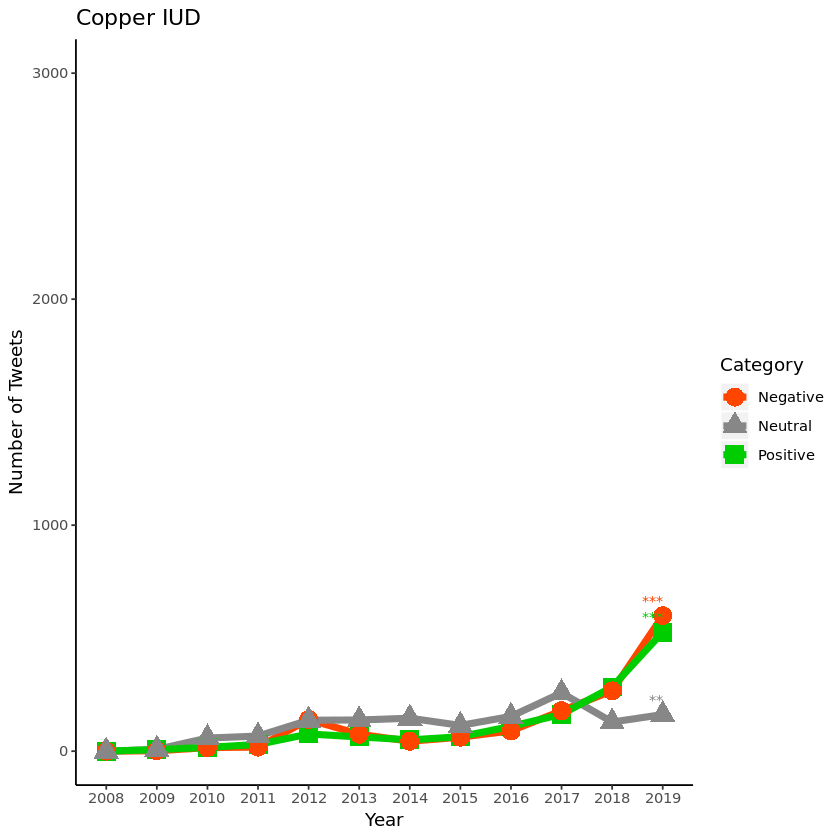

In [416]:
linerGraph( category = "copperIUD", title = "Copper IUD", statSignificant = 0.05)

Using year as id variables


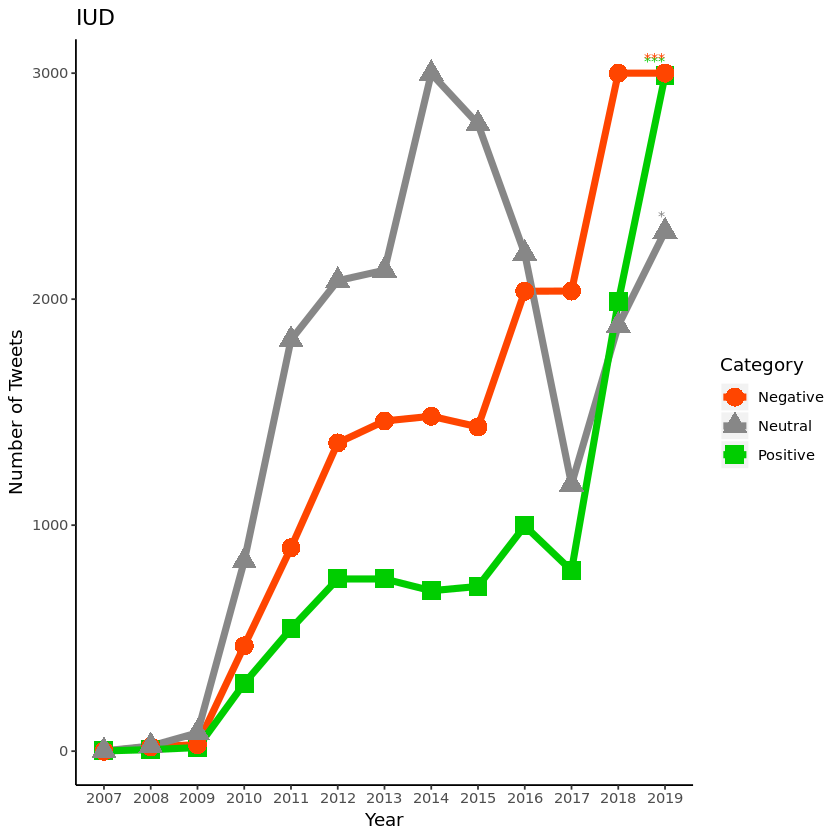

In [414]:
linerGraph( category = "IUD", title = "IUD", statSignificant = 0.05)

Using year as id variables


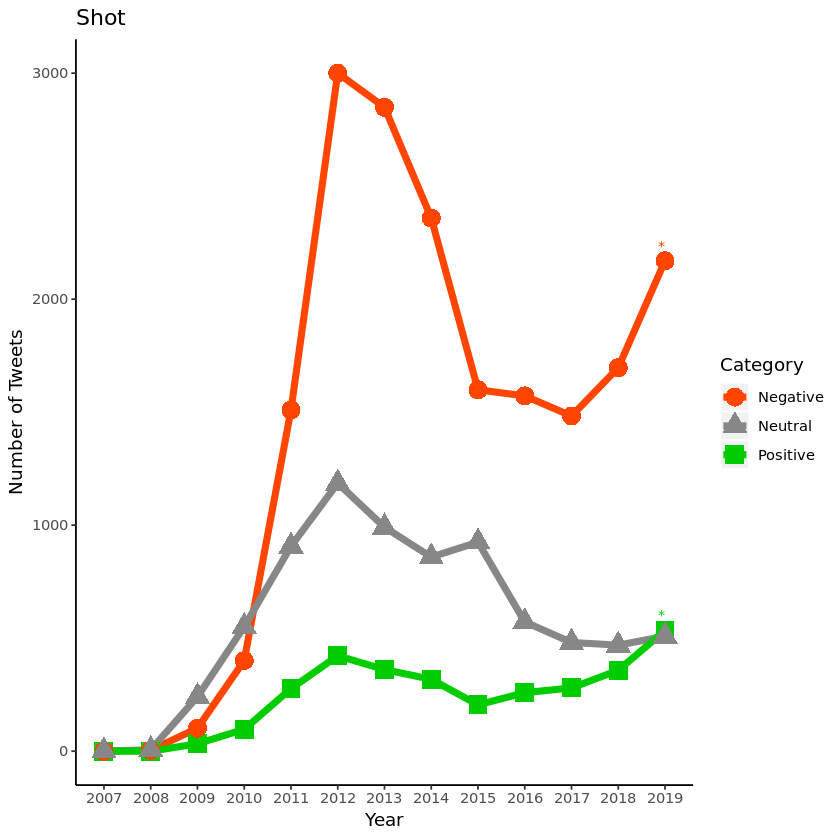

In [421]:
linerGraph( category = "Shot", title = "Shot", statSignificant = 0.05)

Using year as id variables


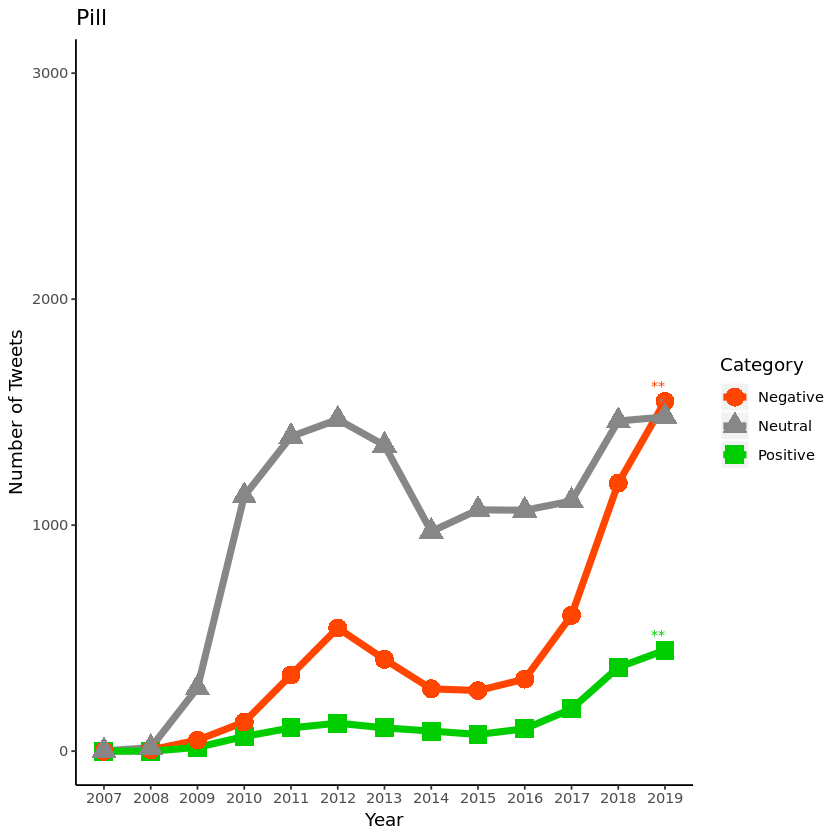

In [418]:
linerGraph( category = "Pill", title = "Pill", statSignificant = 0.05)

Using year as id variables


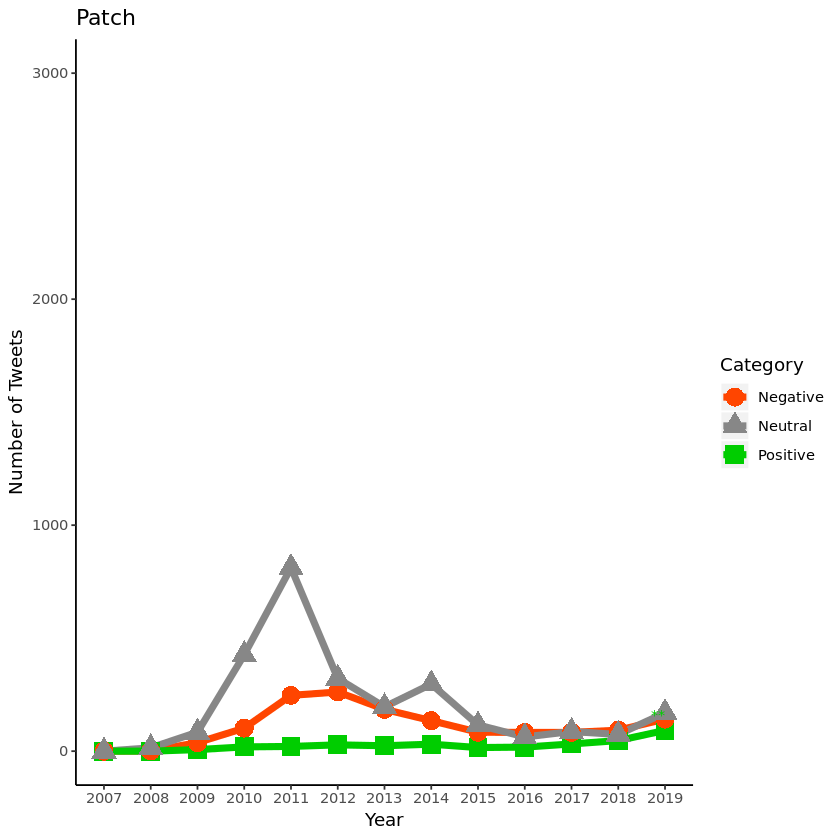

In [419]:
linerGraph( category = "Patch", title = "Patch", statSignificant = 0.05)

Using year as id variables


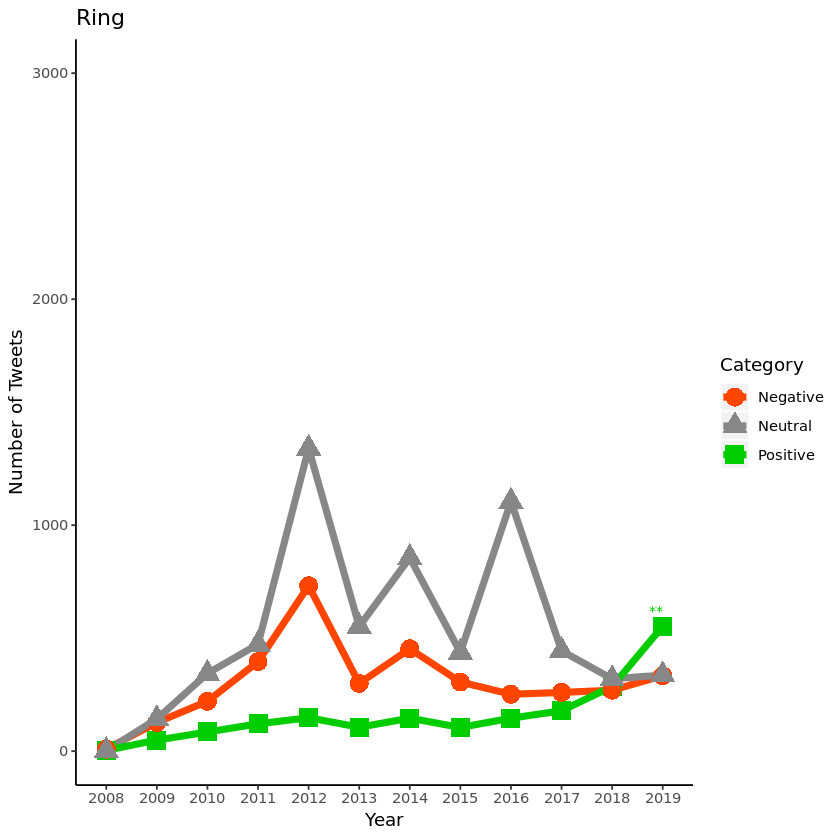

In [420]:
linerGraph( category = "Ring", title = "Ring", statSignificant = 0.05)

Using year as id variables


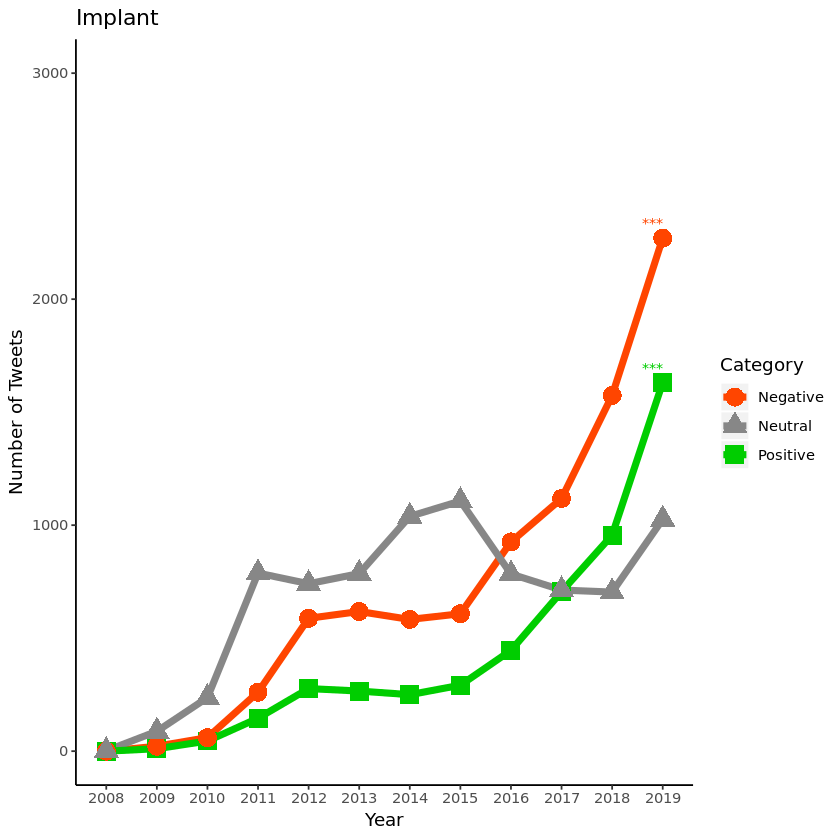

In [417]:
linerGraph( category = "Implant", title = "Implant", statSignificant = 0.05)

Using year as id variables


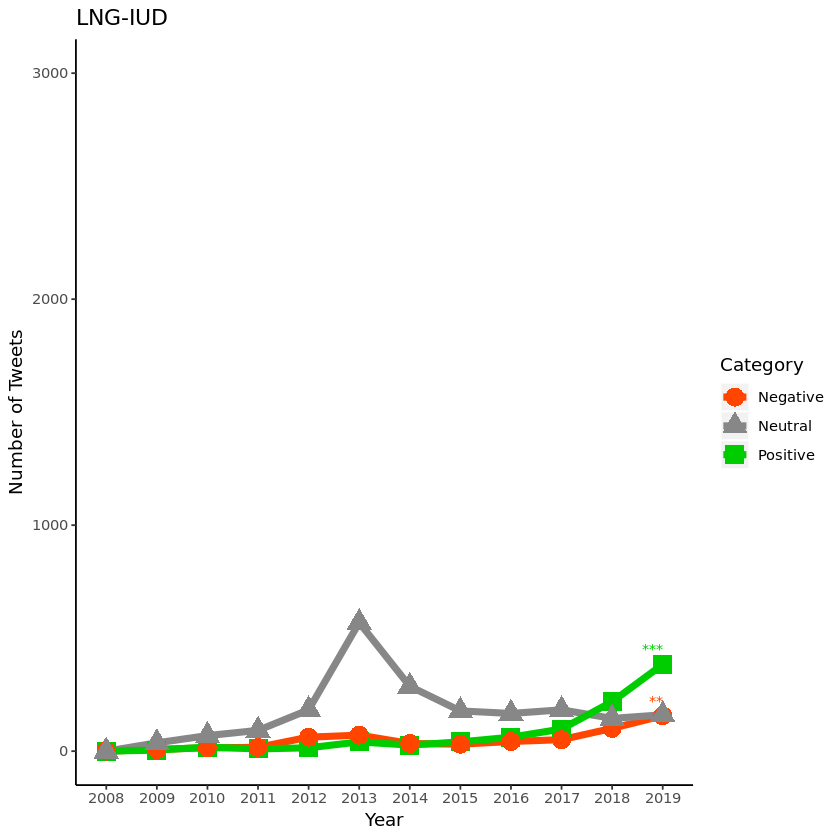

In [415]:
linerGraph( category = "LNG-IUD", title = "LNG-IUD", statSignificant = 0.05)

In [326]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Amazon Linux AMI 2018.03

Matrix products: default
BLAS/LAPACK: /home/ec2-user/anaconda3/envs/R/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Kendall_2.2    reshape2_1.4.3 dplyr_0.8.3    ggplot2_3.1.1 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       pillar_1.3.1     compiler_3.6.1   plyr_1.8.4      
 [5] base64enc_0.1-3  tools_3.6.1      boot_1.3-20      digest_0.6.18   
 [9] uuid_0.1-2       jsonlite_1.6     evaluate_0.13    tibble_2.1.1    
[13] gtable_0.3.0     pkgconfig_2.0.2  rlang_0.4.2      IRdisplay_0.7.0 
[17] IRkernel_0.8.15  repr_0.19.2      withr_2.1.2      stringr_1.4.0   
[21] grid_3.6.1       tidyselect_0.2.5 glue_1.3.1       R6_2.4.0        
[25] pbdZMQ_0.3-3     purrr_0.3.2      magrittr_1.5     scales_1.0.0    
[29] htmltools_0.3.6  